# Lecture 25 – Visualizing Numerical Variables

## Data 6, Summer 2021

In [3]:
from datascience import * # datascience has plotting features built in
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')
#Table.interactive_plots() 

## Review: Categorical Variables

In [4]:
tips = Table.from_df(sns.load_dataset('tips'))
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


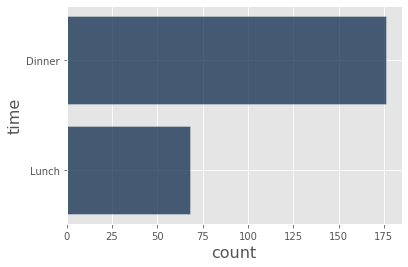

In [5]:
tips.group('time').barh('time')

## `np.arange`

In [6]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
arr = np.arange(3, 9)
arr

array([3, 4, 5, 6, 7, 8])

In [ ]:
np.arange(3, 9, 3)

In [ ]:
arr = np.arange(1, 11)
arr

In [ ]:
np.sum(arr)

In [ ]:
np.arange(3, 11, 2)

np.arange(10, 1, -3)

## Quick check 2

In [ ]:
np.arange(5)

In [ ]:
np.arange(3, 13, 3)

In [ ]:
2 ** np.arange(10)

In [ ]:
np.sum(np.arange(11)** 2)

## Histograms

In [ ]:
tips

In [ ]:
tips.hist('tip', density = False)

### Why do we need `density = False`?

Look at the histogram that results if we don't set `density = False`.

In [ ]:
tips.hist('tip')

This is a perfectly valid histogram too, but it's not one that we will study in this class.

### Quick Check 1

In [ ]:
numbers = Table().with_columns(
    'Height', np.array([72, 61, 63, 74, 68, 67, 65, 73, 65, 62, 66, 69, 75, 61, 61, 61, 65, 60, 64])
)

numbers.hist('Height', density = False, bins = [60, 64, 68, 72, 76])

## Choosing bins

In [ ]:
tips.hist('tip', 
          density = False, 
          bins = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]))

### `np.arange`, revisited

In [ ]:
tips.hist('tip', 
          density = False, 
          bins = np.arange(12))

Let's look at another column.

In [ ]:
tips.hist('total_bill', density = False)

Before setting bins, it's a good idea to look at the smallest and largest values in the column.

In [ ]:
tips.column('total_bill').min()

In [ ]:
tips.column('total_bill').max()

In [8]:
bins_3 = np.arange(3, 54, 3)
bins_3

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51])

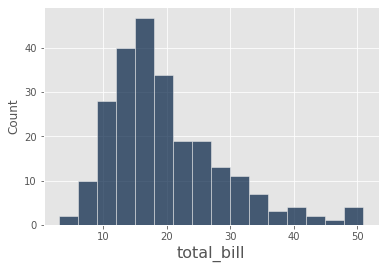

In [10]:
tips.hist('total_bill', 
          density = False, 
          bins = bins_3)

In [11]:
bins_7 = np.arange(3, 53, 7)
bins_7

array([ 3, 10, 17, 24, 31, 38, 45, 52])

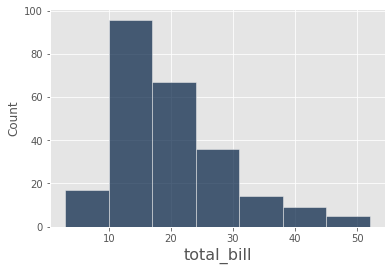

In [12]:
tips.hist('total_bill', 
          density = False, 
          bins = bins_7)

In [14]:
bins_10 = np.arange(3, 63, 10)
bins_10

array([ 3, 13, 23, 33, 43, 53])

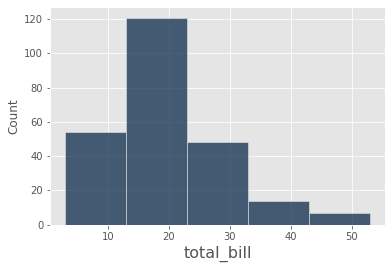

In [15]:
tips.hist('total_bill', 
          density = False, 
          bins = bins_10)

## Overlaid and side-by-side histograms

In [ ]:
tips

One category is `'time'` – we can make separate histograms for every unique value in `'time'`. As a reminder, there are two unique times, `'Lunch'` and `'Dinner'`, so we should expect to see two histograms.

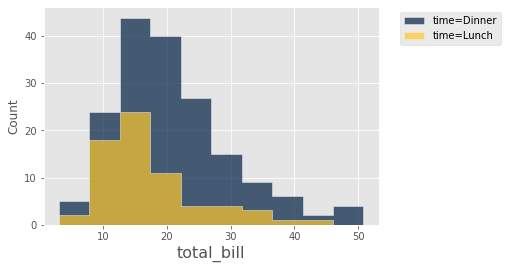

In [16]:
tips.hist('total_bill', density = False, group = 'time')

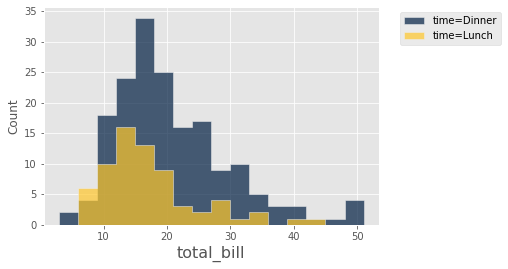

In [17]:
tips.hist('total_bill', density = False, group = 'time', bins = bins_3)

If we want these on separate axes:

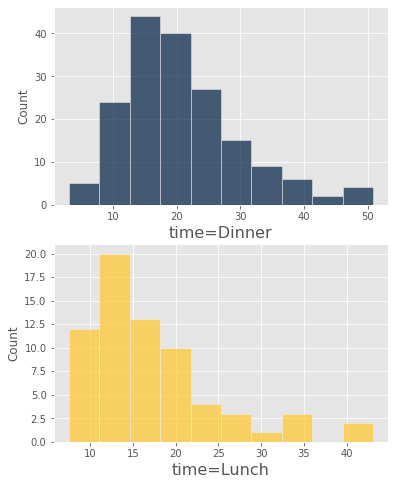

In [19]:
tips.hist('total_bill', density = False, group = 'time', overlay = False)

Note that for whatever reason, using `group`, `overlay`, and `bins` with an array all at the same time doesn't work. (I've raised the issue with the folks who maintain the `datascience` module.)

We could separate by other columns, like `'day'`.

In [ ]:
tips

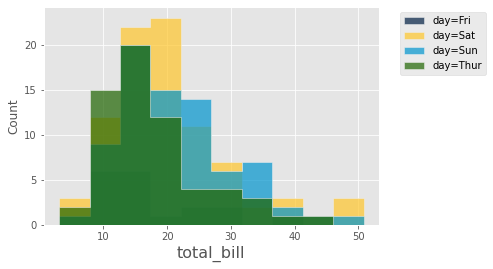

In [20]:
tips.hist('total_bill', density = False, group = 'day')

There's too much going on there – but you can click the legend to hide certain days.

### Quick Check 2

In [21]:
# Tip proportion
tip_pct = 100 * tips.column('tip') / tips.column('total_bill')
tips = tips.with_columns(
    'tip percentage', tip_pct
)

tips

total_bill,tip,sex,smoker,day,time,size,tip percentage
16.99,1.01,Female,No,Sun,Dinner,2,5.94467
10.34,1.66,Male,No,Sun,Dinner,3,16.0542
21.01,3.5,Male,No,Sun,Dinner,3,16.6587
23.68,3.31,Male,No,Sun,Dinner,2,13.978
24.59,3.61,Female,No,Sun,Dinner,4,14.6808
25.29,4.71,Male,No,Sun,Dinner,4,18.624
8.77,2,Male,No,Sun,Dinner,2,22.805
26.88,3.12,Male,No,Sun,Dinner,4,11.6071
15.04,1.96,Male,No,Sun,Dinner,2,13.0319
14.78,3.23,Male,No,Sun,Dinner,2,21.8539


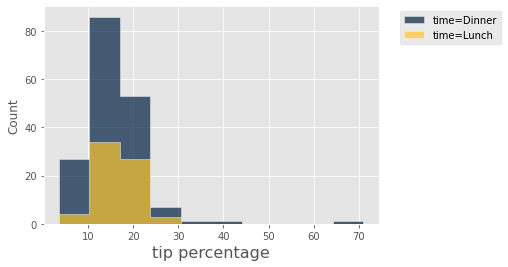

In [22]:
tips.hist('tip percentage', density = False,
          group='time')

## Documentation

Run the following cell.

In [ ]:
tips.hist?